# Analisis Data Bike Sharing

Notebook ini berisi analisis eksploratori untuk dataset Bike Sharing.

In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load dan Persiapan Data

In [2]:
# Load datasets
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

# Tampilkan informasi dataset harian
print("Dataset Harian:")
print(day_df.info())
print("\nSampel data harian:")
print(day_df.head())

print("\nDataset Per Jam:")
print(hour_df.info())
print("\nSampel data per jam:")
print(hour_df.head())

Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Sampel data harian:
   instant      dteday  season  yr  mnth  holiday  

## Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu?

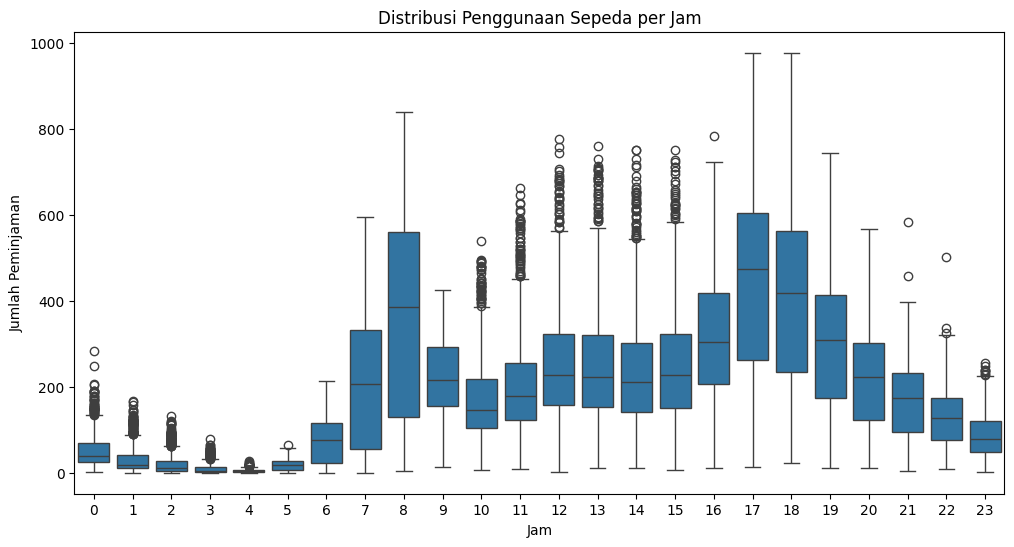

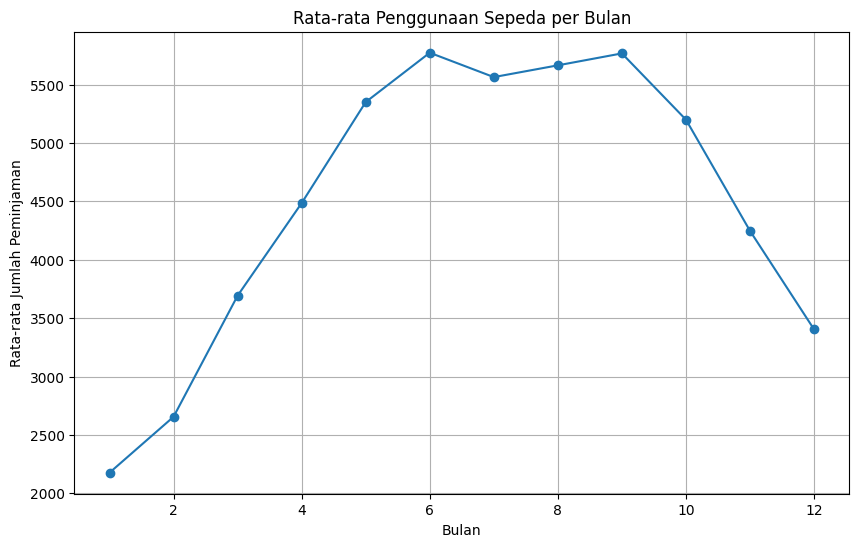

In [3]:
# Analisis pola harian
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_df, x='hr', y='cnt')
plt.title('Distribusi Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Analisis pola bulanan
monthly_usage = day_df.groupby('mnth')['cnt'].mean()
plt.figure(figsize=(10, 6))
monthly_usage.plot(kind='line', marker='o')
plt.title('Rata-rata Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.show()

## Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penggunaan sepeda?

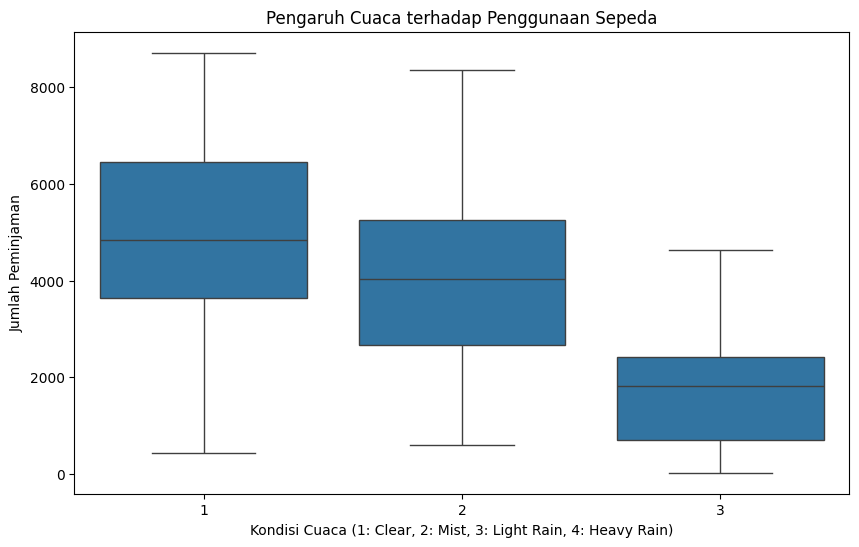

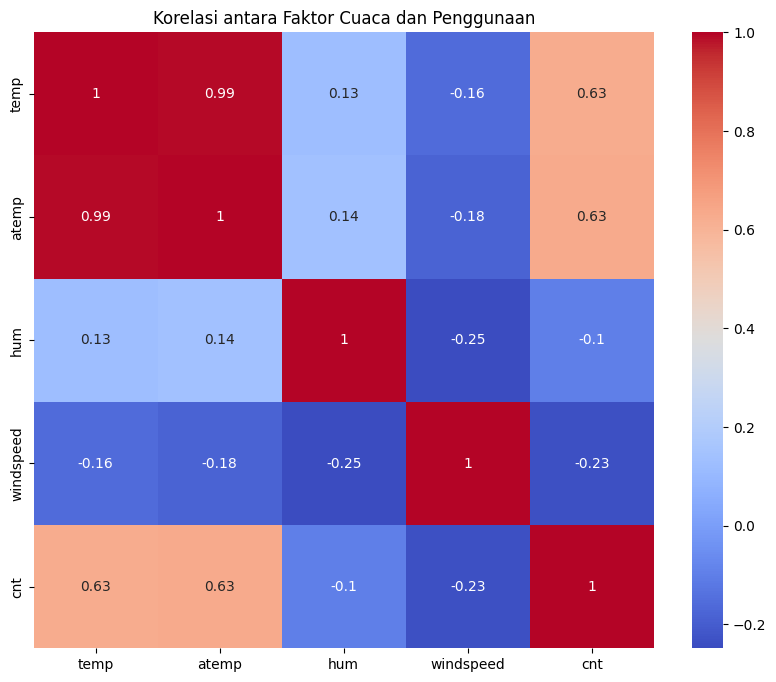

In [4]:
# Analisis berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Korelasi faktor cuaca
weather_factors = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation = day_df[weather_factors].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Faktor Cuaca dan Penggunaan')
plt.show()

## Pertanyaan 3: Bagaimana karakteristik pengguna (casual vs registered)?

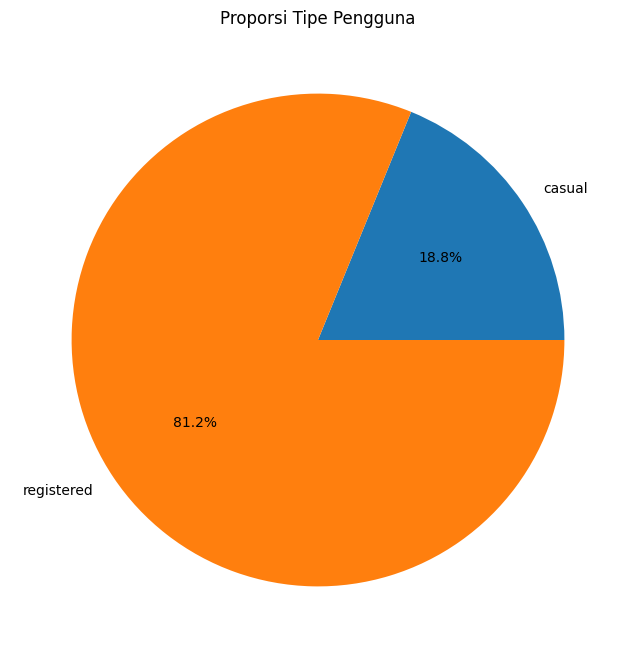

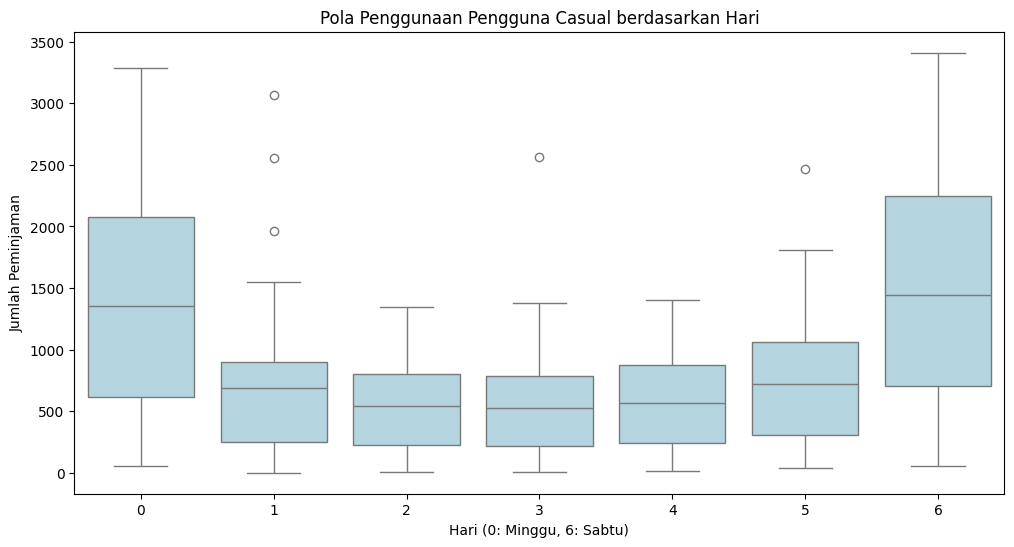

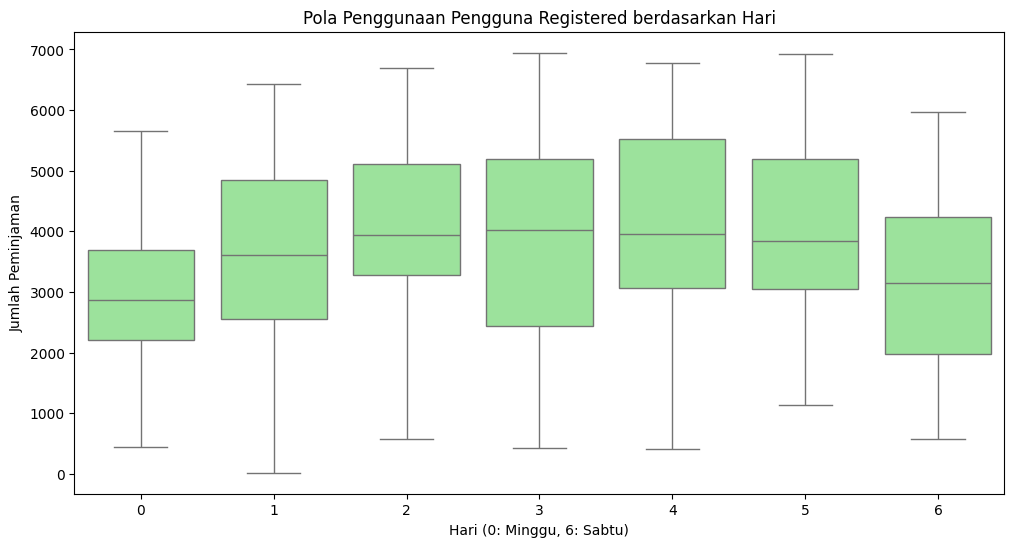

In [5]:
# Analisis tipe pengguna
user_types = ['casual', 'registered']
user_means = day_df[user_types].mean()

plt.figure(figsize=(8, 8))
plt.pie(user_means, labels=user_types, autopct='%1.1f%%')
plt.title('Proporsi Tipe Pengguna')
plt.show()

# Pola penggunaan berdasarkan tipe pengguna dan hari
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df, x='weekday', y='casual', color='lightblue')
plt.title('Pola Penggunaan Pengguna Casual berdasarkan Hari')
plt.xlabel('Hari (0: Minggu, 6: Sabtu)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df, x='weekday', y='registered', color='lightgreen')
plt.title('Pola Penggunaan Pengguna Registered berdasarkan Hari')
plt.xlabel('Hari (0: Minggu, 6: Sabtu)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

## Kesimpulan

Dari analisis di atas, dapat disimpulkan:

1. Pola Waktu:
   - Terdapat puncak penggunaan pada jam berangkat (8-9) dan pulang kerja (17-18)
   - Penggunaan lebih tinggi pada bulan-bulan dengan cuaca baik (musim panas dan gugur)

2. Pengaruh Cuaca:
   - Cuaca cerah menghasilkan penggunaan tertinggi
   - Temperatur memiliki korelasi positif dengan jumlah peminjaman
   - Hujan dan kelembaban tinggi menurunkan penggunaan

3. Karakteristik Pengguna:
   - Pengguna terdaftar mendominasi penggunaan sistem
   - Pengguna casual lebih aktif pada akhir pekan
   - Pengguna terdaftar memiliki pola yang lebih konsisten sepanjang minggu